<a href="https://colab.research.google.com/github/Ajay07pandey/play_store_app_review_system/blob/main/play_store_app_review_system_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. **Introduction**

**Google Play is a website and app that gives users access to download and purchase apps, books, game, movies, music, and other content from Google for Android devices.**
Android is the dominant mobile operating system today with about 85% of all mobile devices running Google’s OS. The Google Play Store is the largest and most popular Android app store.



To launch themselves successfully and create an identity for themselves in this oversaturated market, they need to ensure that majority of the essential factors are taken into consideration. However, the lack of a clear understanding impacts both the developers and users.
It is an immense challenge for a developer to know whether they are focusing on the right path to make their app successful on the platform.

The purpose of our project was to gather and analyze detailed information on apps in the Google Play Store in order to provide insights on app features and the current state of the Android app market.

# 2. Exploratory Data Analysis

Exploratory data analysis (EDA) is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods. It helps determine how best to manipulate data sources to get the answers you need, making it easier for data scientists to discover patterns, spot anomalies, test a hypothesis, or check assumptions.

EDA is primarily used to see what data can reveal beyond the formal modeling or hypothesis testing task and provides a better understanding of data set variables and the relationships between them. It can also help determine if the statistical techniques you are considering for data analysis are appropriate. 

**Importing required libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

 Mounting the drive to access our dataset.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Read the data set

In [ ]:
df_data= pd.read_csv("/content/drive/MyDrive/Project EDA/Copy of Play Store Data.csv")
df_reviews= pd.read_csv("/content/drive/MyDrive/Project EDA/Copy of User Reviews.csv")

In [ ]:
# Checking random 5 rows of the playstore dataset.
df_data.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9551,Learn to code with el Chavo,FAMILY,3.9,5933,60M,"1,000,000+",Free,0,Everyone,Educational,"March 27, 2018",2.6,4.1 and up
10699,FO BOULANGER,FINANCE,NaN,10,19M,50+,Free,0,Everyone,Finance,"May 15, 2018",1.0,4.4 and up
9385,Retro Camera,PHOTOGRAPHY,4.0,125616,Varies with device,"10,000,000+",Free,0,Everyone,Photography,"March 10, 2017",Varies with device,2.3.3 and up
5328,Al-Muhaffiz,BOOKS_AND_REFERENCE,4.7,2319,27M,"50,000+",Free,0,Everyone,Books & Reference,"April 22, 2018",10.10,4.1 and up
7717,CQ,NEWS_AND_MAGAZINES,3.7,7,3.4M,"1,000+",Free,0,Everyone 10+,News & Magazines,"May 18, 2018",1.0.11,4.0.3 and up


In [ ]:
# Checking random 5 rows of the user reviews dataset.
df_reviews.sample(5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
10040,BBC Media Player,This joke! Read comments. If still install app...,Positive,0.145000,0.676667
16334,Blood Pressure Log - MyDiary,Really useful: Line graph helped spot negative...,Positive,0.182275,0.447487
20062,"CM Flashlight (Compass, SOS)",It's bright!,Positive,0.875000,0.800000
16692,Blur Image Background,NaN,NaN,NaN,NaN
64221,Housing-Real Estate & Property,Everything old stuff neither clear sold proper...,Positive,0.021591,0.259470


In [ ]:
# Checking the maximum rows and columns available in our datasets.
df_data.shape, df_reviews.shape

((10841, 13), (64295, 5))

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


**FINDINGS FROM DATA SET**

**play_store dataframe has 10841 rows and 13 columns. The 13 columns are identified as below:**

1. **App** - It tells us about the name of the application.
2. **Category** - It tells us about the category to which an application belongs.
3. **Rating**- It tells us about the ratings given by the users for a specific application.
4. **Reviews** - It tells us about the total number of users who have given a review for the application.
5. **Size**- It tells us about the size being occupied the application on the mobile phone.
6. **Installs** - It tells us about the total number of installs/downloads for an application.
7. **Type** - It tells us whether the application is free or a paid one.
8. **Price**- It tells us about the price of the application.
9. **Content_Rating**- It tells us about the target audience for the application.
10. **Genres** - It tells us about the various other categories to which an application can belong.
11. **Last_Updated** - It tells us about the when the application was updated.
12. **Current_Ver** - It tells us about the current version of the application. 
13. **Android_Ver** - It tells us about the android version which can support the application on its platform.

Handling duplicate values

In [ ]:
# Determining duplicate values in our play store dataset.
df_data.duplicated().sum()

483

In [ ]:
# Determining duplicate values in our user review dataset.
df_reviews.duplicated().sum()

33616

Dropping duplicate values

In [ ]:
# Dropping the duplicate values from both the datasets.
df_data= df_data.drop_duplicates()
df_review= df_reviews.drop_duplicates()

In [ ]:
# Rechecking the shape of our both dataset after droppin all the duplicates.
df_data.shape, df_reviews.shape

((10358, 13), (64295, 5))

In [ ]:
#Rechecking our both dataset wheather they have any more duplicate values.
df_data.duplicated().sum(), df_reviews.duplicated().sum()

(0, 33616)

**It's good to know that we don't have more duplicate values in both the dataset but still we have some null and missing values. Let's deal with them.**

In [ ]:
df_data.sample(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
4347,Minecraft,FAMILY,4.5,2375336,Varies with device,"10,000,000+",Paid,$6.99,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",1.5.2.1,Varies with device
6237,Discípulos em BH,SOCIAL,NaN,24,5.2M,100+,Free,0,Everyone,Social,"February 24, 2018",1.1.4,4.1 and up


In [ ]:
# Defining the function 
def get_info(df):
  func_df= pd.DataFrame(index= df.columns, columns=["datatype", "total_values", "na_values", "non_na_values", "%na_values", "unique_count"])
  func_df["datatype"]= [type(i) for i in list(df.columns)]
  func_df["total_values"]= [len(df[i]) for i in list(df.columns)]
  func_df["na_values"]= [df[i].isnull().sum() for i in list(df.columns)]
  func_df["non_na_values"]= [(~df[i].isnull()).sum() for i in list(df.columns)]
  func_df["%na_values"]= [df[i].isnull().mean()*100 for i in list(df.columns)]
  func_df["unique_count"]= [len(df[i].unique()) for i in list(df.columns)]
  return func_df

In [ ]:
get_info(df_data)

,datatype,total_values,na_values,non_na_values,%na_values,unique_count
App,<class 'str'>,10358,0,10358,0.000000,9660
Category,<class 'str'>,10358,0,10358,0.000000,34
Rating,<class 'str'>,10358,1465,8893,14.143657,41
Reviews,<class 'str'>,10358,0,10358,0.000000,6002
Size,<class 'str'>,10358,0,10358,0.000000,462
Installs,<class 'str'>,10358,0,10358,0.000000,22
Type,<class 'str'>,10358,1,10357,0.009654,4
Price,<class 'str'>,10358,0,10358,0.000000,93
Content Rating,<class 'str'>,10358,1,10357,0.009654,7
Genres,<class 'str'>,10358,0,10358,0.000000,120


In [ ]:
get_info(df_data)

,datatype,total_values,na_values,non_na_values,%na_values,unique_count
App,<class 'str'>,10358,0,10358,0.000000,9660
Category,<class 'str'>,10358,0,10358,0.000000,34
Rating,<class 'str'>,10358,1465,8893,14.143657,41
Reviews,<class 'str'>,10358,0,10358,0.000000,6002
Size,<class 'str'>,10358,0,10358,0.000000,462
Installs,<class 'str'>,10358,0,10358,0.000000,22
Type,<class 'str'>,10358,1,10357,0.009654,4
Price,<class 'str'>,10358,0,10358,0.000000,93
Content Rating,<class 'str'>,10358,1,10357,0.009654,7
Genres,<class 'str'>,10358,0,10358,0.000000,120


We are having total null values in:

*   Rating = 1465
*   Type = 1
*   Content Rating = 1
*   Current Ver = 8
*   Android Ver = 3

Since we have 0.009654%, 0.009654%, 0.077235%, 0.028963% null values in Type, Content Rating, Current Ver, Android Ver columns respectively which won't affect our results, so we can drop them.

The Rating column contains 1470 NaN values which accounts to apprximately 14.1436% of the rows in the entire dataset. It is not practical to drop these rows because by doing so, we will loose a large amount of data, which may impact the final quality of the analysis.

Replacing all the null values of "Rating" column with Mode





In [ ]:
df_data= df_data.dropna(subset=["Type","Content Rating", "Current Ver", "Android Ver"])

In [ ]:
df_data["Rating"].mode()

0    4.4
dtype: float64

In [ ]:
df_data.fillna(df_data["Rating"].mode()[0], inplace= True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
get_info(df_data )

,datatype,total_values,na_values,non_na_values,%na_values,unique_count
App,<class 'str'>,10346,0,10346,0.0,9648
Category,<class 'str'>,10346,0,10346,0.0,33
Rating,<class 'str'>,10346,0,10346,0.0,39
Reviews,<class 'str'>,10346,0,10346,0.0,5999
Size,<class 'str'>,10346,0,10346,0.0,457
Installs,<class 'str'>,10346,0,10346,0.0,20
Type,<class 'str'>,10346,0,10346,0.0,2
Price,<class 'str'>,10346,0,10346,0.0,92
Content Rating,<class 'str'>,10346,0,10346,0.0,6
Genres,<class 'str'>,10346,0,10346,0.0,119


In [ ]:
df_data.shape

(10346, 13)

There are some special characters (, $ +) and letters (M k) present in the Installs, Size, and Price columns, which make their conversion to a numerical data type difficult. Let's clean by removing these and converting each column to a numeric type.

In [ ]:
# Converting Price into numerical values
df_data['Price'] = df_data['Price'].apply(lambda x : str(x).replace('$','') if '$' in str(x) else str(x))
df_data['Price'] = df_data['Price'].apply(lambda x : float(x))

In [ ]:
# Converting (, +) in install into numerical values
df_data['Installs'] = df_data['Installs'].apply(lambda x : str(x).replace('+','') if '+' in str(x) else str(x))
df_data['Installs'] = df_data['Installs'].apply(lambda x : str(x).replace(',','') if ',' in str(x) else str(x))
df_data['Installs'] = df_data['Installs'].apply(lambda x : float(x))

In [ ]:
df_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Now as you can see in the size column 'M' stands for MB and 'k' stands for KB. it is necessary to convert all the values to a single unit. In this case, we will convert all the units to MB.
(1MB = 1024KB)


In [ ]:
def convert_kb_to_mb(val):
  '''
  This function converts all the KB values to MB. 
  '''
  try:
    if 'M' in val:
      return float(val[:-1])
    elif 'k' in val:
      return round(float(val[:-1])/1024, 2)
    else:
      return val
  except:
    return val

df_data['Size'] = df_data['Size'].apply(lambda x: convert_kb_to_mb(x)) 

In [ ]:
df_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
# convert free values in Type column to 0
df_data[df_data['Type']!='Free'][df_data[df_data['Type']!='Free']['Price']=='0']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [ ]:
#Changing the 'Reviews' column values into valid numeric values
df_data['Reviews'] = pd.to_numeric(df_data['Reviews'])


In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10346 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10346 non-null  object 
 1   Category        10346 non-null  object 
 2   Rating          10346 non-null  float64
 3   Reviews         10346 non-null  int64  
 4   Size            10346 non-null  object 
 5   Installs        10346 non-null  float64
 6   Type            10346 non-null  object 
 7   Price           10346 non-null  float64
 8   Content Rating  10346 non-null  object 
 9   Genres          10346 non-null  object 
 10  Last Updated    10346 non-null  object 
 11  Current Ver     10346 non-null  object 
 12  Android Ver     10346 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1.1+ MB


**4. Working on User reviews data set**

In [ ]:
df_reviews.shape

(30679, 5)

In [ ]:
#finding duplicate values
df_reviews.duplicated().sum()

33616

In [ ]:
df_reviews.sample(5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
51626,GPS Status & Toolbox,Still go-to quick GPS lock. The last update ho...,Positive,0.222222,0.355556
5076,Airbnb,What happen map Search update? The map longer ...,Neutral,0.000000,0.000000
52961,GasBuddy: Find Cheap Gas,What's love? :),Positive,0.500000,0.800000
25296,Cheap hotel deals and discounts — Hotellook,Great come handy couple times week!,Positive,0.775000,0.825000
425,2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif,It's lit,Neutral,0.000000,0.000000


In [ ]:
#Dropping duplicate values
df_reviews= df_reviews.drop_duplicates()

In [ ]:
#Rechecking to verify if duplicate values are removed
df_reviews.duplicated().sum()

0

**so, now we have removed all duplicate values from user review data set, let's proceed to deal with null values.**

In [ ]:
#Dropped all null values.
df_reviews= df_reviews.dropna()

In [ ]:
get_info(df_reviews)

,datatype,total_values,na_values,non_na_values,%na_values,unique_count
App,<class 'str'>,29692,0,29692,0.0,865
Translated_Review,<class 'str'>,29692,0,29692,0.0,27994
Sentiment,<class 'str'>,29692,0,29692,0.0,3
Sentiment_Polarity,<class 'str'>,29692,0,29692,0.0,5410
Sentiment_Subjectivity,<class 'str'>,29692,0,29692,0.0,4474


In [ ]:
df_data.shape, df_reviews.shape

((10346, 13), (29692, 5))

**Sentiment polarty and sentiment subjectivity**

**There are 4 features which gives the information about user engagement with the andriod apps in the play store.**
* Here there is data about the translated reviews given by the users, Sentiment polarity, Sentiment subjectivity and Sentiment for a given app.

* Polarity is float which lies in the range of [-1,1] where value is near to 1 means positive statement and values near to -1 means a negative statement.

* Subjectivity is a float value within the range [0.0 to 1.0] where 0.0 is very objective and 1.0 is very subjective. Subjective sentence expresses some personal feelings, views, beliefs, opinions, allegations, desires, beliefs, suspicions, and speculations where as Objective sentences are factual.

* For example, if subjectivity value is near to 1 means its a public opinion and if its near to 0 means its a factual data.

* Sentiment finally gives whether it is positive, negative or neutral statement/reviews for a given app.


**NOW DATA ANALYSIS ON PLAY STORE APPS**

Top category in the google play store 

In [ ]:
x = df_data['Category'].value_counts().index
y = df_data['Category'].value_counts()
x_axis = []
y_axis = []
for i in range(len(x)):
    x_axis.append(x[i])
    y_axis.append(y[i])


Now we plot the graph with the help of seaborn and taking Number of Apps on X axis and App Categories on Y axis.

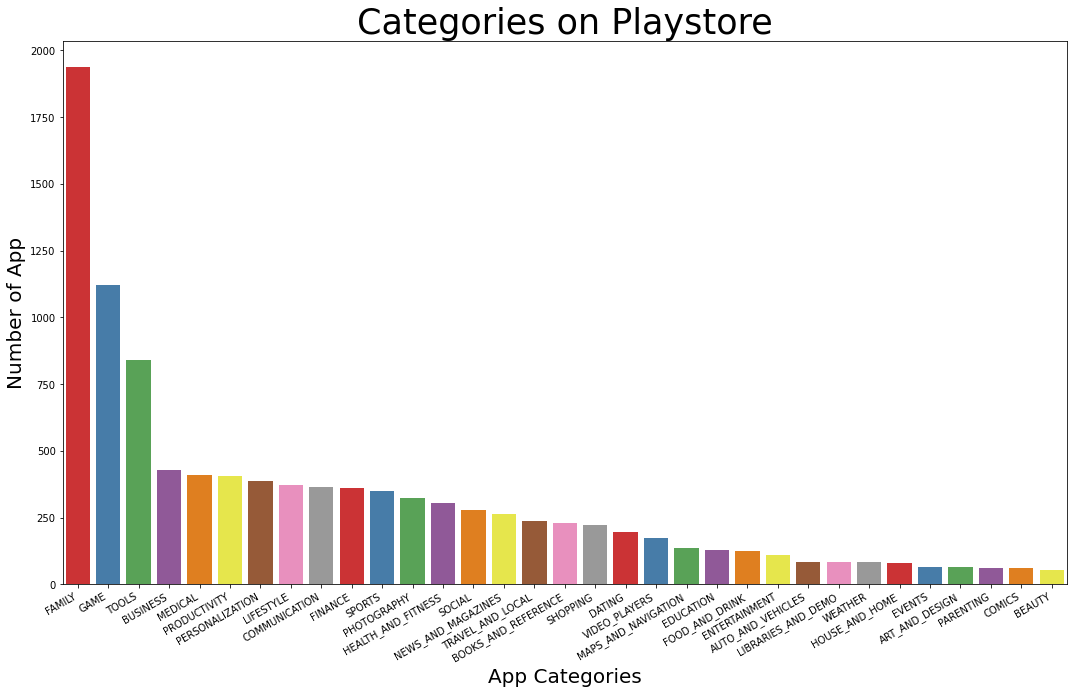

In [ ]:
plt.figure(figsize=(18,10))
plt.xlabel('App Categories', size=20)
plt.ylabel('Number of App', size=20)
graph = sns.barplot(x = x_axis, y = y_axis,palette = "Set1")
graph.set_title("Categories on Playstore", fontsize = 35)
graph.set_xticklabels(graph.get_xticklabels(),rotation=30, horizontalalignment='right');

From the above Bar Chart's output we can say that most of the apps in the play store come under FAMILY & GAME category and least are of EVENTS & BEAUTY Category.
It means majority of apps are from either FAMILY or GAME category

Does higher the number of app in a particular category result in popularity of apps(Higher no of installs) ? **Lets find out..**.


**Number of Installed apps in Play store**


Text(0.5, 1.0, 'Total app installs in each category')

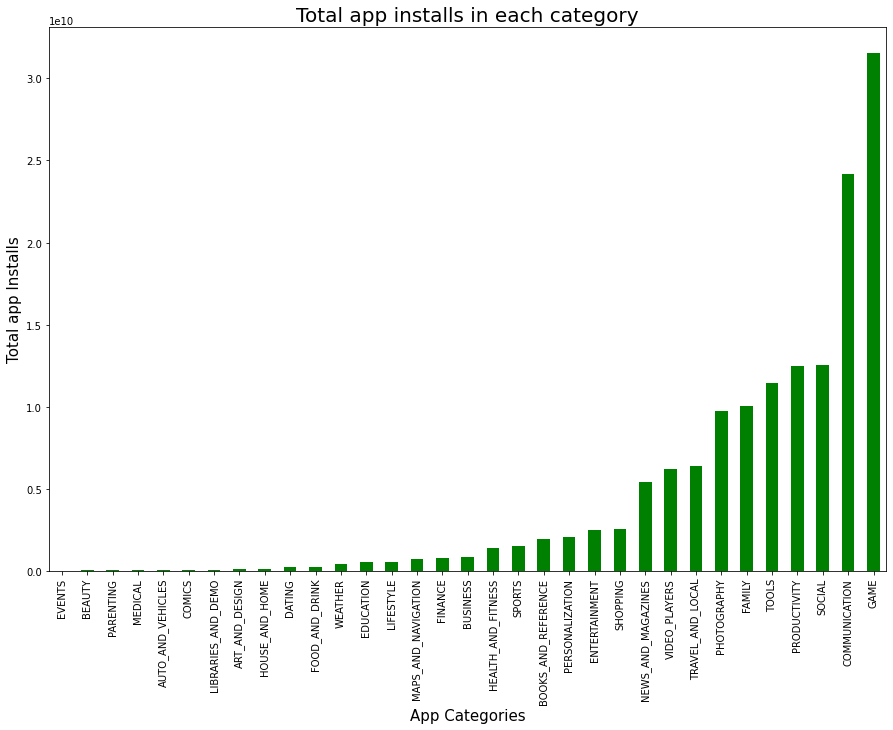

In [ ]:
# Highest number of installed apps in each category
variable = df_data.groupby(['Category'])['Installs'].sum().sort_values()
variable.plot.bar(figsize=(15,10), color = 'g', )
plt.ylabel('Total app Installs', fontsize = 15)
plt.xlabel('App Categories', fontsize = 15)
plt.title('Total app installs in each category', fontsize = 20)

Hence from the above figure it is clear that people love GAME,COMMUNICATION and SOCIAL Apps rather than FAMILY catogeries apps instead they are more in numbers, so we can take insights that GAMING Application will have good opportunity in the future also.

**HOW DOES APP RATING AFFECT THE APPLICATION**

After witnessing the market share for each category of apps, let's see how all these apps perform on an average. App ratings on a scale of 1 to 5, it shows company's overall brand image. Ratings are a key performance indicator of an app.

The analysing of app ratings is important because, this only gives the information how much an app is liked or disliked by the people. So that we have plotted the histrogram for Ratings it shows the category wise avg rating.

Average Rating 4.21788130678523


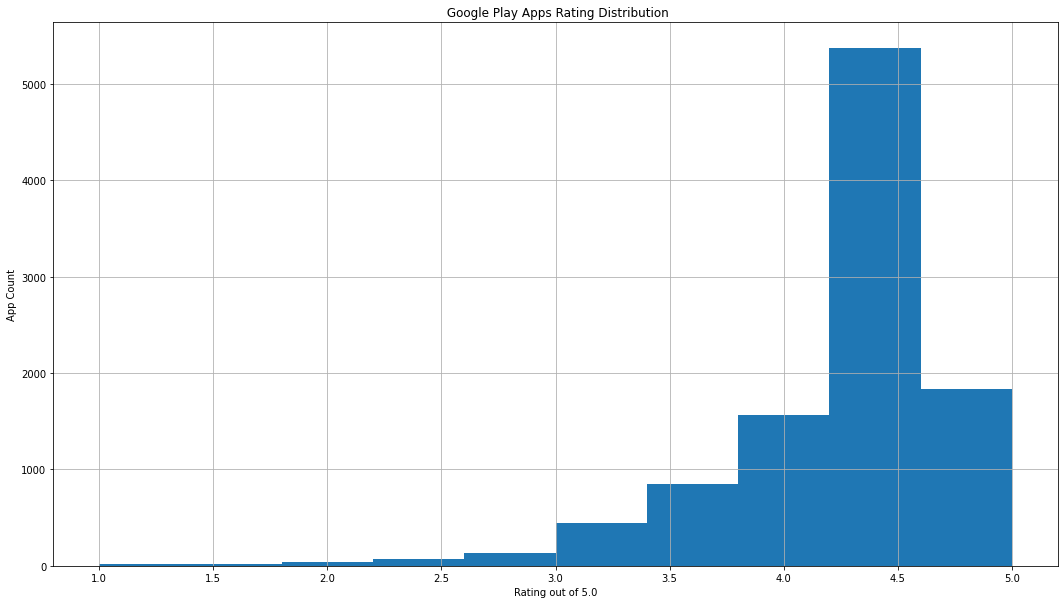

In [ ]:
#Plot a histogram from the Rating column
plt.figure(figsize=(18,10))
print(f"Average Rating {df_data['Rating'].mean()}")

df_data["Rating"].hist()
plt.title(" Google Play Apps Rating Distribution")
plt.ylabel("App Count")
plt.xlabel("Rating out of 5.0")
plt.show()

From our observation, we found that the average volume of ratings across all app categories is 4.217.In the histogram plot majority of the apps are highly rated with only a few exceptions in the low-rated apps.

**How Size, Reviews, Installs and Price of apps are correlated.**

Text(0.5, 1.0, 'Corelation Heatmap for Playstore Data')

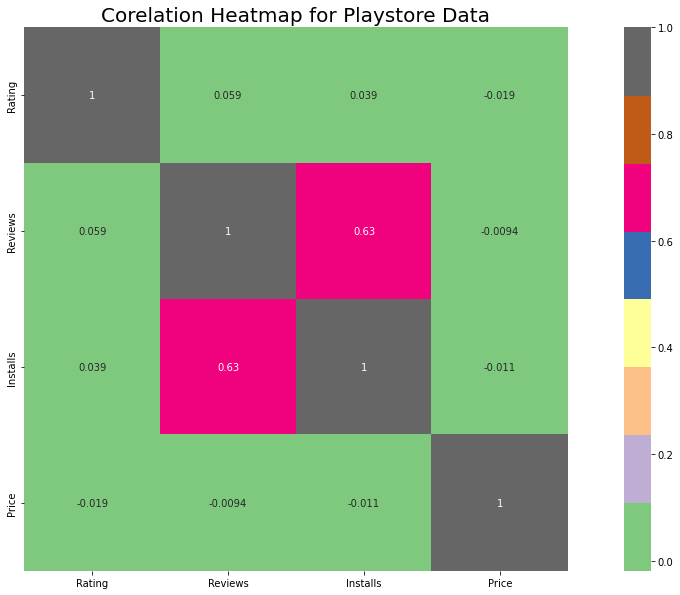

In [ ]:
# Heat map for play_store
plt.figure(figsize = (20,10))
sns.heatmap(df_data.corr(), annot= True,cmap=plt.cm.Accent,square=True)
plt.title('Corelation Heatmap for Playstore Data', size=20)

 1. There is a positive correlation between the Reviews and Installs column i.e (0.63). Higher the number of review,higher the total number of downloads.
which means customer downloads a given app more if it is reviewed by large no.of people.

2. The Price is slightly negatively correlated with the Rating, Reviews, and  
Installs. 
Which means if the price of app increases, the average rating, total number of reviews and Installs fall down.

3. The Rating is slightly positive correlated with the Installs and Reviews column.
This shows that if the Rating of an app increases then it will also increase the downloads and reviews of a given app.

4. Hence we can conclude that increasing the review and Rating count in the app may increase the market share.

5. To capture the market more rapidley The launch price of an app should be less at the starting and then can be increased with time.

 ***Relation between app category and app price***

So now comes the hard part. How are companies and developers supposed to make ends meet? What monetization strategies can companies use to maximize profit? The costs of apps are largely based on features, complexity, and platform. Lets plot a graph and see.

Here we are selecting some most popular app category from the data set for our analysis i.e GAME, FAMILY, PHOTOGRAPHY, MEDICAL, TOOLS, FINANCE, LIFESTYLE , BUSINESS

Text(0.5, 1.0, 'App pricing trend across categories')

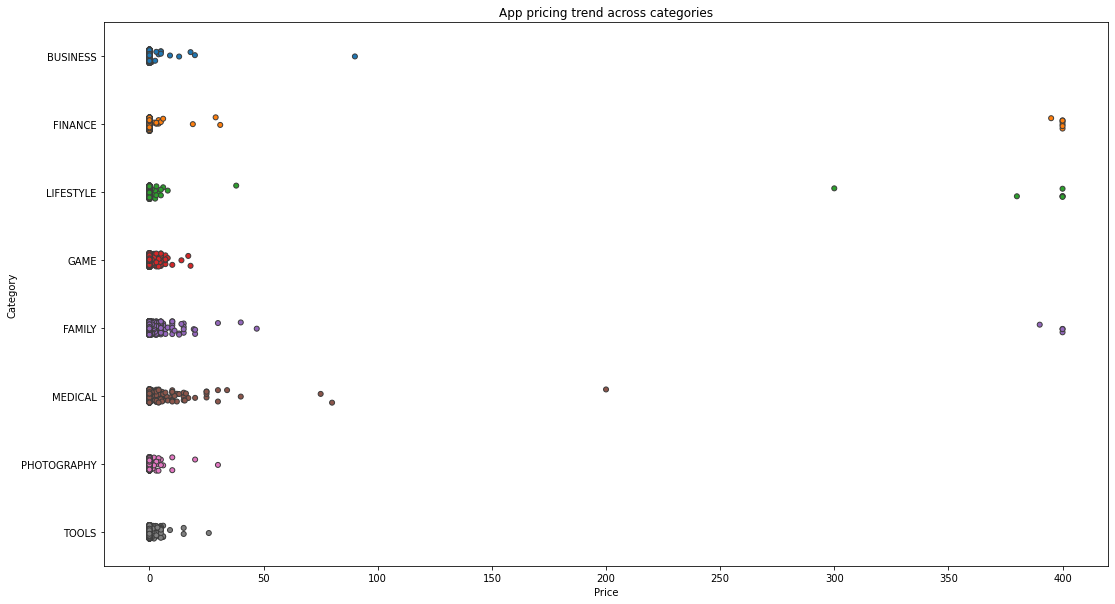

In [ ]:
graph, plot = plt.subplots()
graph.set_size_inches(18,10)
popular_app= df_data[df_data.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY','MEDICAL', 'TOOLS', 'FINANCE','LIFESTYLE','BUSINESS'])]
plot = sns.stripplot(x = popular_app['Price'], y = popular_app['Category'], jitter=True, linewidth=1)
plot.set_title('App pricing trend across categories')




* Many factors to be consider when selecting the right pricing strategy for your mobile app. It is important to reevaluate the app price before entring the market.Is it worth the pice or not.

* Here we can see that Different categories apps demand different price ranges. Some apps that are simple and easy are free, where as apps in category FAMILY LIFESTYLE FINANCE and MEDICAL are high in price.

* All Game apps are comparetively low in price, may be thats the reason game apps have more number of downloads, as we have seen earlier.   

Common phrase vs count